In [29]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

#### Функции

In [30]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад')
    ax[0].grid(True)

    ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

#### Исходные данные

In [31]:
# Исходные данные

# Коэффициенты прямых связей
b = [1., -3.979582, 7.872744, -9.657728, 7.872744, -3.979582, 1.]

# Коэффициенты обратных связей
a = [1., 2.751455, -1.734483, -4.577439, 3.850063, -0.779725, 0]

# Коэффициенты секций второго порядка [b0,b1,b2,a0,a1,a2], где b - коэффициенты прямых связей, a - коэффициенты обратных связей
s = [[1.,-0.592930,1.,1.,1.819818,-0.849748],
     [1.,-1.641792,1.,1.,1.802068,-0.932227],
     [1.,-1.744860,1.,1.,1.799134,-0.984304]]

# Коэффициенты секций второго порядка [b0,b1,b2,a0,a1,a2], где b - коэффициенты прямых связей, a - коэффициенты обратных связей
# Последний коэффициент (A2) с инвертированным знаком
s = [[1.,-0.592930,1.,1.,1.819818,0.849748],
     [1.,-1.641792,1.,1.,1.802068,0.932227],
     [1.,-1.744860,1.,1.,1.799134,0.984304]]


#### Импульсная характеристика фильтра

Результаты расчета: 
1.0 -9.4006 46.2716 -158.306 422.6685 -938.0405 1800.0873 -3066.8984 4724.3821 -6662.2776 8669.5009 -10453.4004 11682.0524 -12043.1777 11308.8256 -9392.6609 6387.0851 -2570.543 -1619.3194 5644.4738 -8948.7068 11049.5288 -11623.4805 10568.8876 -8033.5327 4400.6253 -233.8035 -3810.6376 7089.9305 -9081.3713


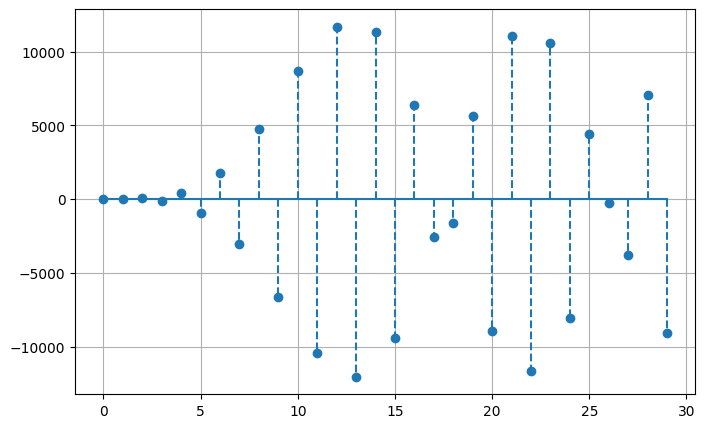

In [32]:
# Импульсная характеристика фильтра

# Входной сигнал
# x = [1.] + 30*[0.]
x = [1., *np.zeros(shape=29)]

# Отклик фильтра на воздействие единичного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.sosfilt(sos=s, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Переходная характеристика фильтра

Результаты расчета: 
1.0 -8.4006 37.871 -120.435 302.2335 -635.807 1164.2804 -1902.6181 2821.7641 -3840.5135 4828.9874 -5624.413 6057.6394 -5985.5384 5323.2872 -4069.3736 2317.7115 -252.8315 -1872.1509 3772.3229 -5176.3839 5873.1449 -5750.3356 4818.552 -3214.9808 1185.6445 951.8411 -2858.7965 4231.1341 -4850.2372


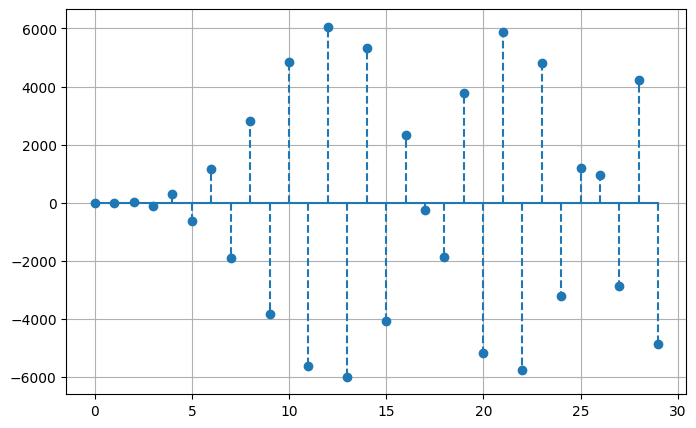

In [33]:
# Переходная характеристика фильтра

# Входной сигнал
x = np.ones(shape=30)

# Отклик фильтра на воздействие входного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.sosfilt(sos=s, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
# ax.set(xticks=range(len(x)), yticks=range(0, 40, 5))
ax.grid()
plt.show()

#### Расчет нулей и полюсов

In [34]:
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.sos2zpk(sos=s)

print(f'Нули: {z}')
print(f'Полюса: {p}')
print(f'Коэффициент усиления: {k}')

Нули: [0.296465+0.95504372j 0.296465-0.95504372j 0.820896+0.57107772j
 0.820896-0.57107772j 0.87243 +0.48873909j 0.87243 -0.48873909j]
Полюса: [-0.909909+0.14769432j -0.909909-0.14769432j -0.901034+0.34693621j
 -0.901034-0.34693621j -0.899567+0.41842946j -0.899567-0.41842946j]
Коэффициент усиления: 1.0


#### Диаграмма нулей и полюсов

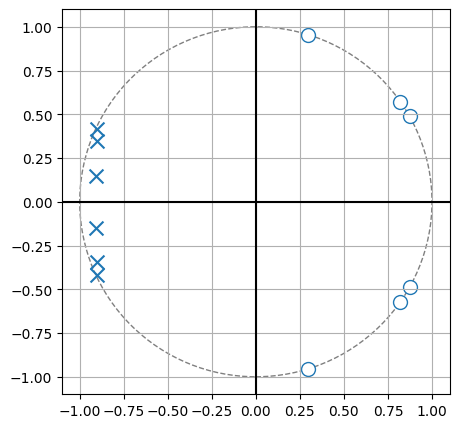

In [35]:
ZerosPolesDiagram(z=z, p=p)

#### Амплитудно-частотная и фазо-частотная характеристики фильтра

In [36]:
# Определяем АЧХ и ФЧХ фильтра

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# worN - количество вычисляемых откликов
# whole - False: вычисляется отклик на частоты от 0 до Пи, True: вычисляется отклик на частоты от 0 до 2Пи
# include_nyquist - вычислять отклик для конечной частоты (в данном случае для 2Пи), который по умолчанию не вычисляется
w, h = sp.sosfreqz(sos=s, worN=512, whole=True)

In [37]:
# Пример расчета модуля отклика фильтра
print(np.sqrt(h[5].real**2 + h[5].imag**2), abs(h[5]))

0.002418672605215691 0.002418672605215691


In [38]:
# Пример расчета аргумента отклика фильтра
print(np.arctan(h[5].imag/h[5].real), np.angle(h[5]))

-0.0038818128848484884 -0.0038818128848484884


In [39]:
# Расчет АЧХ по откликам фильтра
fr = FrequencyResponse(h=h)

# Расчет ФЧХ по откликам фильтра
pr = PhaseResponse(h=h)

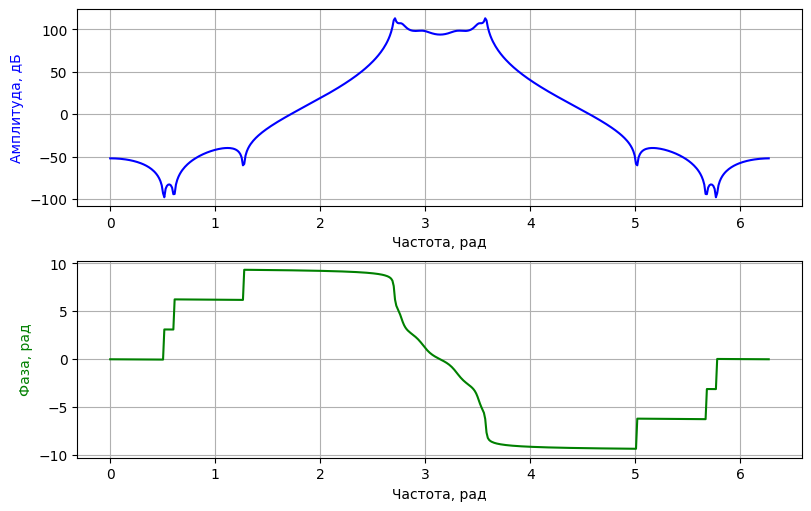

In [40]:
# Графики АЧХ и ФЧХ
FRPRDiagram(w=w, fr=fr, pr=pr)